# Project : BigMart Sales Data

## Intoduction

>This dataset collects information from 8523 item sold in 10 outlets in a long period of time.
A number of characteristics about the items are included in each column
>### characteristics description
>- Item_Identifier: Item id
>- Item_Weight: Item weight
>- Item_Fat_Content: the item fat content
>- Item_Visibility: The Visibility of the item in the market
>- Item_Type: Item type 
>- Item_MRP: Material requirements Planning 
>- Outlet_Identifier: Market Identifier 
>- Outlet_Establishment_Year: Establishment Year of the Market
>- Outlet_Size:	The Market size
>- Outlet_Location_Type: The Market location
>- Outlet_Type: Market Type
>- Item_Outlet_Sales: that is the item sales in this Market

> **We will try to understand Which factors are effect on the sales of the items and of the stores**

In [1]:
# import data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling
In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
len(df)

8523

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.duplicated().sum()

0

### Data Cleaning

In [7]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


we will fill the null values with unknown because of their large number.

In [8]:
df['Outlet_Size'].fillna('Unknown',inplace=True)
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

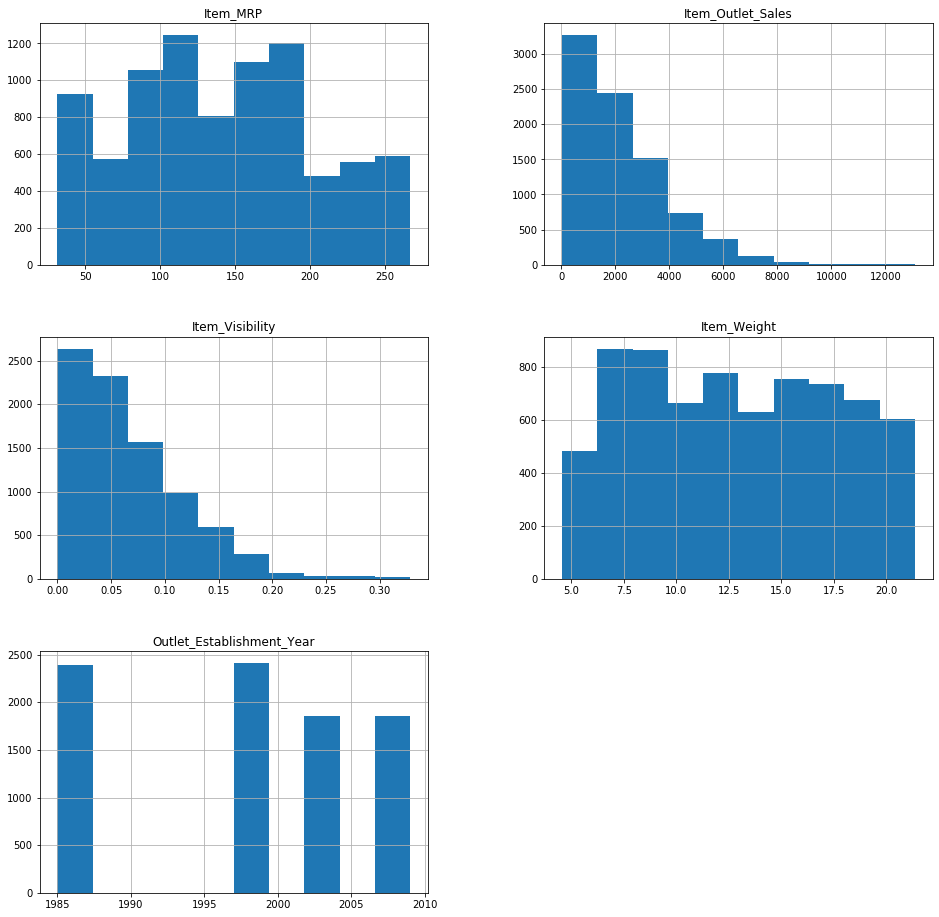

In [32]:
df.hist(figsize=(16,16));

## **Stores investigation** 

### Q1 Outlet with the items

In [16]:
# df.groupby(['Outlet_Identifier'])['Item_Identifier'].count()
df.groupby(['Outlet_Identifier','Outlet_Size']).count()['Item_Identifier']

Outlet_Identifier  Outlet_Size
OUT010             Unknown        555
OUT013             High           932
OUT017             Unknown        926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             Unknown        929
OUT046             Small          930
OUT049             Medium         930
Name: Item_Identifier, dtype: int64

We found that OUT010,OUT017,OUT045 has unknown values for outlet size

## **The sold items from each store**

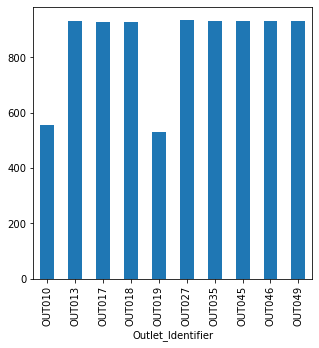

In [20]:
df.groupby(['Outlet_Identifier'])['Item_Identifier'].count().plot(kind = 'bar',figsize = (5,5));

store 10 and 19 has low items number

### Q3 Outlet with the Sales

In [24]:
df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

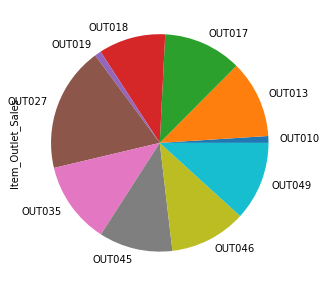

In [21]:
df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().plot(kind='pie',figsize=(5,5));

### Q4: Most profitable Outlet Type

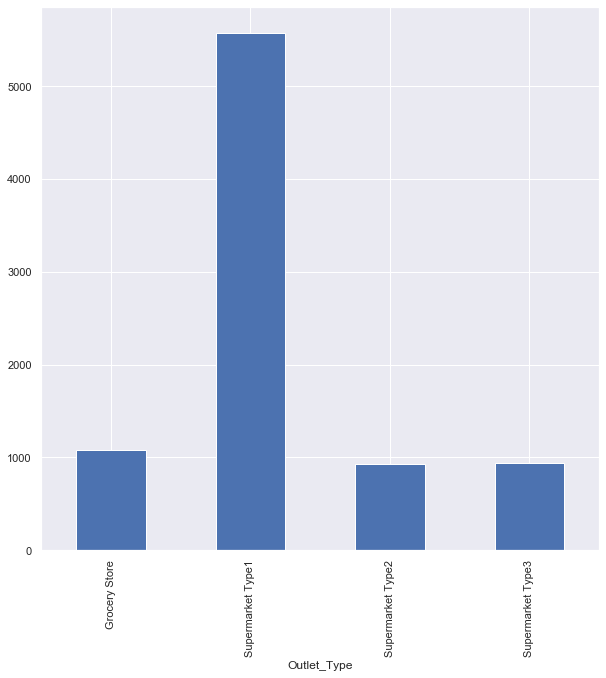

In [39]:
df.groupby(['Outlet_Type']).count()['Item_Identifier'].plot.bar(figsize= (10,10));

### Q5: Most profitable Outlet tier

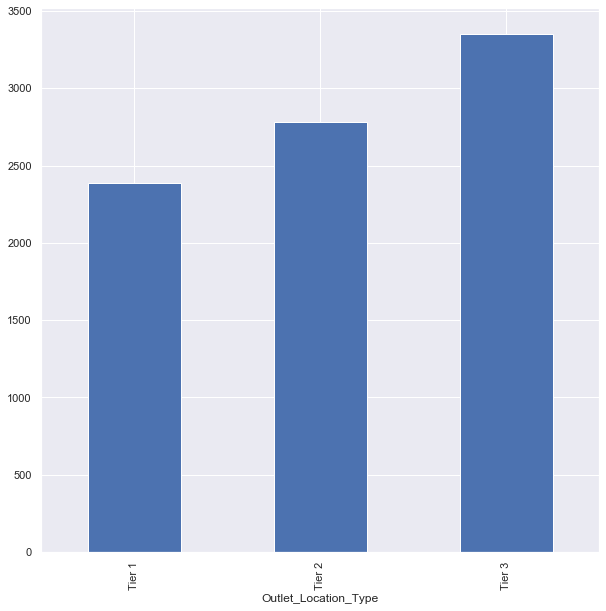

In [37]:
df.groupby(['Outlet_Location_Type']).count()['Item_Identifier'].plot.bar(figsize= (10,10));

## Items investigation

### Q1: type with visibility

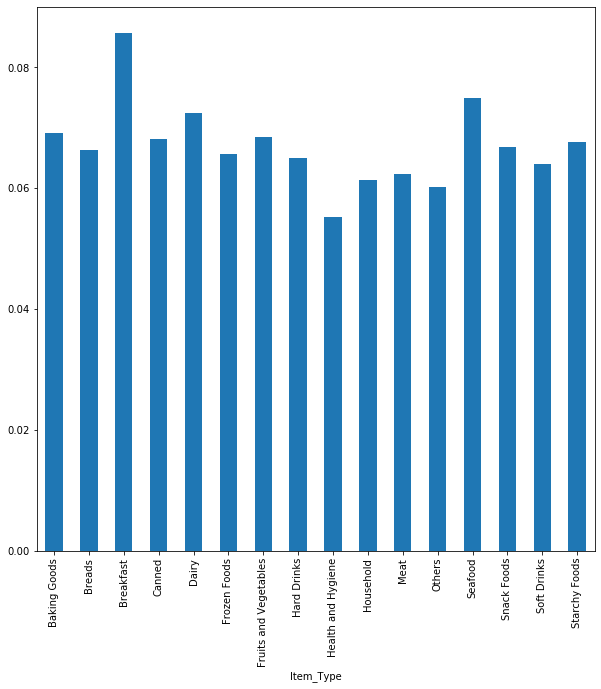

In [24]:
visibility_type = df.groupby(['Item_Type']).mean()['Item_Visibility']
visibility_type.plot.bar(figsize= (10,10));

## Q2: type with sales

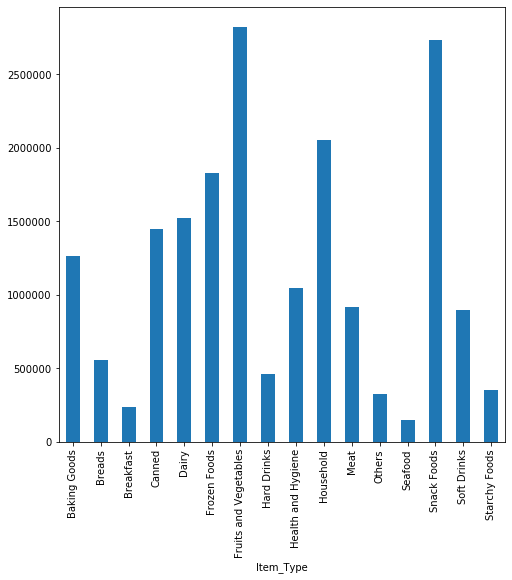

In [25]:
sales_type = df.groupby(['Item_Type']).sum()['Item_Outlet_Sales']
sales_type.plot.bar(figsize= (8,8));

## Q3: most sold types

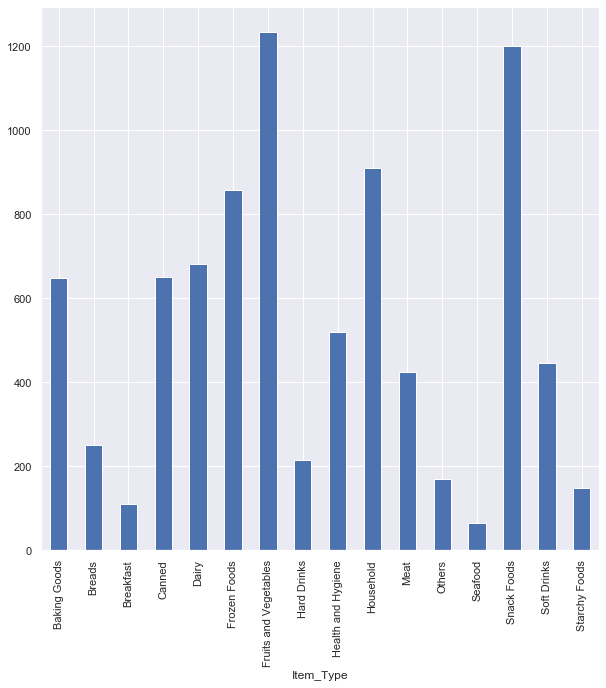

In [34]:
df.groupby(['Item_Type']).count()['Item_Identifier'].plot.bar(figsize= (10,10));

### Conclusion